![](http://i67.tinypic.com/2jcbwcw.png)

# Project Ocean Trash

## Classification of Marine Debris data

**Author:** Jan Xu

**Date:** Dec 1 2018

### Import modules and visualization packages

In [1]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns

pd.set_option('display.max_columns', 100) # Print 100 Pandas columns

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

# visualization

%matplotlib inline
%pylab inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

#import xgboost as xgb

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 10 , 6

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Special distribution plot (will be used later)
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    plt.tight_layout()

### Import classification data

In [4]:
dataclass = pd.read_csv("Datasets/dataclass.csv")
dataclass.head()

,Date,X,Y,Debris,Trash1,NoTrash2
0,07/07/2012,-124.566667,48.383333,0,0,0
1,07/07/2012,-124.016667,48.283333,0,0,0
2,07/07/2012,-124.033333,48.316667,0,0,0
3,07/07/2012,-124.350000,48.300000,1,0,0
4,07/07/2012,-126.183333,44.900000,1,0,0


In [5]:
X = dataclass[['X', 'Y']].values
Y = dataclass['Debris'].values
print(X.shape)
print(Y.shape)

(962, 2)
(962,)


In [7]:
baseline = len(dataclass[dataclass['Debris'] == 1]) / len(dataclass)
print('Baseline accuracy:', baseline*100, '%')

Baseline accuracy: 74.42827442827443 %


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=255)
print('Number of samples in training data:',len(x_train))
print('Number of samples in test data:',len(x_test))

Number of samples in training data: 865
Number of samples in test data: 97


In [35]:
# Name our regression object
classifier = KNeighborsClassifier()

classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)

Training accuracy: 0.815028901734104


In [37]:
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Accuracy of the model on unseen test data: 0.8144329896907216


### Confusion matrix

In [38]:
y_true = y_test
y_pred = classifier.predict(x_test)
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=['Predicted No Debris','Predicted Debris'],index=['Actual No Debris','Actual Debris'])
print('Confusion matrix of test data is: \n', ConfusionMatrix)

Confusion matrix of test data is: 
                   Predicted No Debris  Predicted Debris
Actual No Debris                    9                14
Actual Debris                       4                70


In [39]:
print("Average precision - ", precision_score(y_true, y_pred, average = None))

Average precision -  [0.69230769 0.83333333]


In [40]:
print("Average recall - ", recall_score(y_true, y_pred, average = None))

Average recall -  [0.39130435 0.94594595]


In [41]:
# PLOT THE DECISION BOUNDARIES:
# 1.create meshgrid of all points between 

'''
For that we will create a mesh between [x_min, x_max]x[y_min, y_max].
We will choose a 2d vector space ranging from values +- 0.5 from our 
min and max values of longitude and latitude.
Then we will divide that whole region in a grid of  0.02 units cell size.

'''

h = 0.02  # step size in the mesh
x_min = dataclass['X'].min() - .5
x_max = dataclass['X'].max() + .5
y_min = dataclass['Y'].min() - .5
y_max = dataclass['Y'].max() + .5

# print x_min, x_max, y_min, y_max

long_range = np.arange(x_min, x_max, h)
lat_range = np.arange(y_min, y_max, h)

# Create datapoints for the mesh
long_range_vals, lat_range_vals = np.meshgrid(long_range, lat_range)

# Predict debris occurrence in meshgrid
prediction = classifier.predict(np.c_[long_range_vals.ravel(), lat_range_vals.ravel()])

print('Finished predicting debris occurrence')

Finished predicting debris occurrence


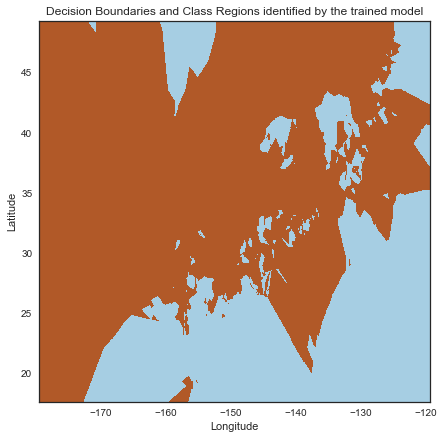

In [42]:
# Put the result into a color plot
prediction = prediction.reshape(long_range_vals.shape)
plt.figure(figsize=(7,7))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.pcolormesh(long_range_vals, lat_range_vals, prediction , cmap=plt.cm.Paired)
plt.title('Decision Boundaries and Class Regions identified by the trained model')
#plt.colorbar()
plt.show()

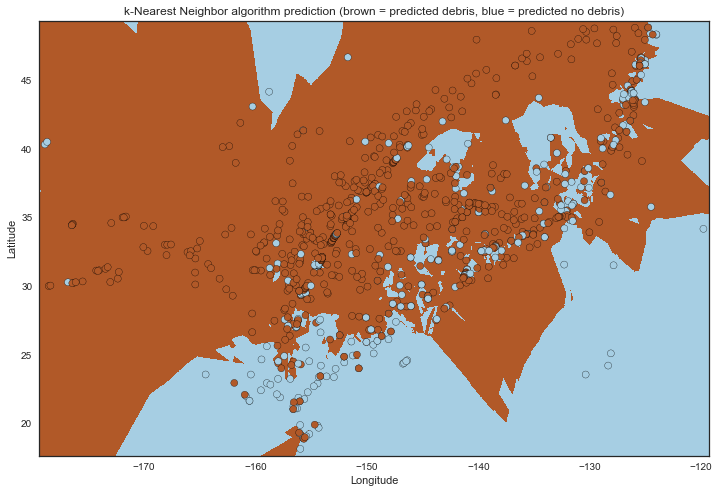

In [50]:
# Plot also the training points
plt.figure(figsize=(12,8))

plt.pcolormesh(long_range_vals, lat_range_vals, prediction, cmap=plt.cm.Paired)

plt.scatter(dataclass['X'], dataclass['Y'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.colorbar()
plt.xlim(long_range_vals.min(), long_range_vals.max())
plt.ylim(lat_range_vals.min(), lat_range_vals.max())
plt.title('k-Nearest Neighbor algorithm prediction (brown = predicted debris, blue = predicted no debris)')
plt.savefig("kneighbor.png")

### Try different classifier algorithms

In [17]:
# Logistic regression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.7421965317919075
Accuracy of the model on unseen test data: 0.7628865979381443


In [18]:
# Support Vector Classification
classifier = SVC()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.8104046242774566
Accuracy of the model on unseen test data: 0.8247422680412371


In [25]:
# Linear Support Vector Classification
classifier = SVC()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.8104046242774566
Accuracy of the model on unseen test data: 0.8247422680412371


In [19]:
# Random Forest
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.9329479768786128
Accuracy of the model on unseen test data: 0.7319587628865979


In [20]:
# Gaussian Naive Bays
classifier = GaussianNB()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.7699421965317919
Accuracy of the model on unseen test data: 0.8144329896907216


In [23]:
# Perceptron
classifier = Perceptron()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.25780346820809247
Accuracy of the model on unseen test data: 0.23711340206185566


In [22]:
# Stochastic Gradient Descent
classifier = SGDClassifier()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.7421965317919075
Accuracy of the model on unseen test data: 0.7628865979381443


In [24]:
# Decision Tree
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
training_accuracy = classifier.score(x_train, y_train)
print('Training accuracy:', training_accuracy)
test_accuracy = classifier.score(x_test, y_test)
print('Accuracy of the model on unseen test data:', test_accuracy)

Training accuracy: 0.9468208092485549
Accuracy of the model on unseen test data: 0.7319587628865979
